<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#0.-Imports" data-toc-modified-id="0.-Imports-1">0. Imports</a></span><ul class="toc-item"><li><span><a href="#0.1-Local" data-toc-modified-id="0.1-Local-1.1">0.1 Local</a></span></li><li><span><a href="#0.2-General" data-toc-modified-id="0.2-General-1.2">0.2 General</a></span></li></ul></li><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-2">1. Introduction</a></span><ul class="toc-item"><li><span><a href="#1.1-Why-?" data-toc-modified-id="1.1-Why-?-2.1">1.1 Why ?</a></span></li><li><span><a href="#1.2-How-?" data-toc-modified-id="1.2-How-?-2.2">1.2 How ?</a></span></li><li><span><a href="#1.3-What-?" data-toc-modified-id="1.3-What-?-2.3">1.3 What ?</a></span></li></ul></li><li><span><a href="#2.-GraphLang-v1" data-toc-modified-id="2.-GraphLang-v1-3">2. GraphLang v1</a></span><ul class="toc-item"><li><span><a href="#2.1-Data-Acquisition" data-toc-modified-id="2.1-Data-Acquisition-3.1">2.1 Data Acquisition</a></span></li><li><span><a href="#2.2-Preprocessing" data-toc-modified-id="2.2-Preprocessing-3.2">2.2 Preprocessing</a></span></li><li><span><a href="#2.3-Issues" data-toc-modified-id="2.3-Issues-3.3">2.3 Issues</a></span></li></ul></li><li><span><a href="#3.-GraphLang-v2" data-toc-modified-id="3.-GraphLang-v2-4">3. GraphLang v2</a></span><ul class="toc-item"><li><span><a href="#3.1-Data-Acquisition" data-toc-modified-id="3.1-Data-Acquisition-4.1">3.1 Data Acquisition</a></span></li><li><span><a href="#3.2-Features-Engineering" data-toc-modified-id="3.2-Features-Engineering-4.2">3.2 Features Engineering</a></span></li></ul></li><li><span><a href="#4.-Graph-Construction" data-toc-modified-id="4.-Graph-Construction-5">4. Graph Construction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Distance-matrix" data-toc-modified-id="Distance-matrix-5.0.1">Distance matrix</a></span></li><li><span><a href="#Weight-Matrix" data-toc-modified-id="Weight-Matrix-5.0.2">Weight Matrix</a></span><ul class="toc-item"><li><span><a href="#horizontal-white-lines-are-due-to-pyplot.spy-(proof-below)" data-toc-modified-id="horizontal-white-lines-are-due-to-pyplot.spy-(proof-below)-5.0.2.1">horizontal white lines are due to pyplot.spy (proof below)</a></span></li></ul></li><li><span><a href="#Degree-matrix" data-toc-modified-id="Degree-matrix-5.0.3">Degree matrix</a></span></li></ul></li></ul></li><li><span><a href="#5.-Unsupervised-Clustering" data-toc-modified-id="5.-Unsupervised-Clustering-6">5. Unsupervised Clustering</a></span><ul class="toc-item"><li><span><a href="#5.1-Spectral-Decomposition" data-toc-modified-id="5.1-Spectral-Decomposition-6.1">5.1 Spectral Decomposition</a></span></li><li><span><a href="#5.x-Learning-(leads-to-bad-clustering)" data-toc-modified-id="5.x-Learning-(leads-to-bad-clustering)-6.2">5.x Learning (leads to bad clustering)</a></span></li><li><span><a href="#5.x-Silhouette-?" data-toc-modified-id="5.x-Silhouette-?-6.3">5.x Silhouette ?</a></span></li><li><span><a href="#5.x-Gaussian-Mixture-Model" data-toc-modified-id="5.x-Gaussian-Mixture-Model-6.4">5.x Gaussian Mixture Model</a></span></li></ul></li><li><span><a href="#6.-Evaluation" data-toc-modified-id="6.-Evaluation-7">6. Evaluation</a></span></li><li><span><a href="#7.-Inference" data-toc-modified-id="7.-Inference-8">7. Inference</a></span></li><li><span><a href="#8.-Limitations" data-toc-modified-id="8.-Limitations-9">8. Limitations</a></span></li><li><span><a href="#9.-Conclusion" data-toc-modified-id="9.-Conclusion-10">9. Conclusion</a></span></li><li><span><a href="#10.-Future-Work" data-toc-modified-id="10.-Future-Work-11">10. Future Work</a></span></li></ul></div>

# 0. Imports

## 0.1 Local

In [1]:
import spectral
import plots
import learning
import models
%reload_ext autoreload
%autoreload 2

## 0.2 General

In [2]:
import scipy

import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns

from sklearn import preprocessing, model_selection
from plotly.offline import init_notebook_mode

from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

In [4]:
init_notebook_mode(connected=True)

In [5]:
%matplotlib inline
sns.set(rc={"figure.figsize": (15, 6)})
sns.set_palette(sns.color_palette("Set2", 10))

# 1. Introduction

## 1.1 Why ?
Reading is too mainstream. What if you could get the important ideas from a text without even reading it ? What about comparing several documents based on their textual content ? Or maybe you just want to visualize the concepts present in a book and their interaction ? GraphLang is the tool you (will) need to boost your texts using graphs.

## 1.2 How ?
This project is all about analysing textual resources using graphs and extracting useful insights. The main idea is to represent a document using the cooccurrences of its words, turning that into a graph and leverage the power of graph analysis tools to make sense of this document. At first the graph could be built by only considering words directly adjacent to each other and representing this proximity with a link in the graph, where the nodes would be the words themselves. The recipe could then be complexified by considering also words at distance N from each other (N would have to be defined) and defining edge weights as a function of N. Punctuation could also be taken into account and would influence the weight of edges (two words, one at the end of a sentence and the other at the beginning of the next one shouldn’t (maybe) have a strong edge between them). This graph could be extended to take into account multiple documents at once using signals on the edges. Another idea would be to use the natural graph structure that emerges from the natural language and the relations between words. This could be extracted using a “Natural language processing” tool.



## 1.3 What ?
The techniques mentioned above could be applied to a bunch of textual resources, including news articles, books or even tweets (the latter ones could be used in batch, one tweet alone would certainly not provide enough information).


# 2. GraphLang v1

Build a graph with edges between words next to each others

In [6]:
# INSERT CODE

## 2.1 Data Acquisition

Bible & Coran - SHOULD BE THE SAME AS GRAPHLANG V2 (20NewsGroup)

In [7]:
# INSERT CODE

## 2.2 Preprocessing

Stopwords & ...

In [8]:
# INSERT CODE

## 2.3 Issues

Spectral Clustering is not working

In [9]:
# INSERT CODE

# 3. GraphLang v2

General idea similar to howework 03

1. Data Analysis
1. Compute features for news article (TF-IDF)
2. Compute distance between articles
3. Build a weighted graph using distance between articles 

## 3.1 Data Acquisition

Scikit-Learn -> 20NewsGroups

In [10]:
news_chunk = fetch_20newsgroups(subset='all')

In [11]:
news_target = news_chunk.target
news_target_names = news_chunk.target_names 

In [12]:
y_all = news_target

In [13]:
df_y = pd.DataFrame(pd.DataFrame(y_all)[0].value_counts())
df_y.reset_index(inplace=True)
df_y.columns = ['label', 'counts']

In [14]:
parent_cat_names = ['Computer', 'Recreational', 'Religion', 'Politics', 'Science', 'Sale']
parent_cat_keyw = ['comp.', 'rec.', 'religion', '.politics.', 'sci.', 'misc.forsale']

def sub_to_parent(name):
    if 'atheism' in name:
        return 'Religion'
    for p, kw in zip(parent_cat_names, parent_cat_keyw):
        if kw in name:
            return p
    raise ValueError('Keyword not found: ' + str(name))

In [15]:
df_y_names = pd.DataFrame(news_target_names, columns=['cat'])
df_y_names['p_cat'] = df_y_names['cat'].apply(sub_to_parent)
df_y_names['p_label'] = df_y_names['p_cat'].apply(lambda x: parent_cat_names.index(x))

In [16]:
df_y_names = df_y_names.reset_index().set_index(['p_cat', 'cat'])

In [17]:
df_y_names.columns = ['label', 'p_label']

In [18]:
df_y_merged = pd.merge(df_y_names.reset_index(), df_y, on='label').set_index(['p_cat', 'cat'])
df_y_merged.sort_index(level=['p_cat','cat'], ascending=[1, 1], inplace=True)

In [19]:
df_y_merged

label  p_label  counts
p_cat        cat                                             
Computer     comp.graphics                 1        0     973
             comp.os.ms-windows.misc       2        0     985
             comp.sys.ibm.pc.hardware      3        0     982
             comp.sys.mac.hardware         4        0     963
             comp.windows.x                5        0     988
Politics     talk.politics.guns           16        3     910
             talk.politics.mideast        17        3     940
             talk.politics.misc           18        3     775
Recreational rec.autos                     7        1     990
             rec.motorcycles               8        1     996
             rec.sport.baseball            9        1     994
             rec.sport.hockey             10        1     999
Religion     alt.atheism                   0        2     799
             soc.religion.christian       15        2     997
             talk.religion.misc           19        2     628
Sale         misc.forsale                  6        5     975
Science      sci.crypt                    11        4     991
             sci.electronics              12        4     984
             sci.med                      13        4     990
             sci.space                    14        4     987

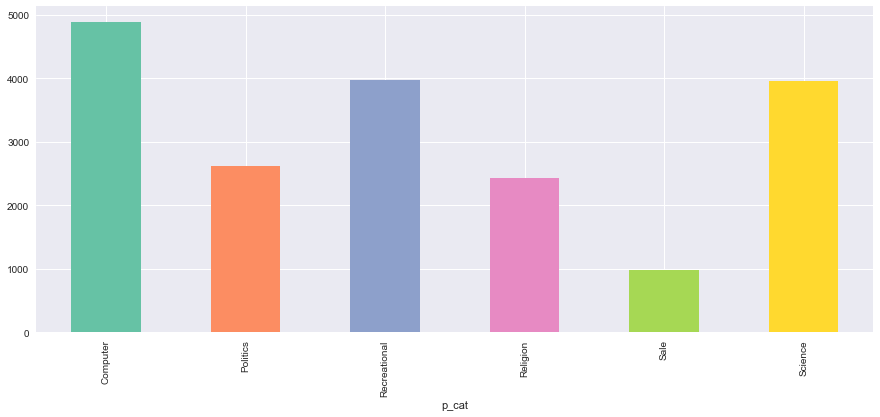

In [20]:
df_y_merged.reset_index().groupby('p_cat').agg(sum)['counts'].plot(kind='bar');

** TODO: INSERT WHY WE SELECTED FOLLOWING COLUMNS **

In [21]:
selected_cat = ['Computer', 'Politics', 'Recreational', 'Religion'] #, 'Science']
selected_labels = set(df_y_merged.loc[selected_cat]['label'].values)

In [22]:
def is_in(s):
    return np.vectorize(lambda x: x in s)

In [23]:
mask_selected = is_in(selected_labels)(news_target)

In [24]:
y = y_all[mask_selected]

In [25]:
label_to_p_label = dict(df_y_merged[['label', 'p_label']].values)

y_parent = np.vectorize(lambda x: label_to_p_label[x])(y)

## 3.2 Features Engineering

TF-IDF

In [26]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, sublinear_tf=True, max_features=1000)

In [27]:
news_features = vectorizer.fit_transform([d for d, b in zip(news_chunk.data, mask_selected) if b])

feature_names = vectorizer.get_feature_names()

In [28]:
X = scipy.sparse.csr_matrix.todense(news_features)

In [29]:
X.shape, y.shape, y_parent.shape

((13919, 1000), (13919,), (13919,))

**with a subset of the data**

In [30]:
subset_size = 2000

In [31]:
X = X[:subset_size]
y = y[:subset_size]
y_parent = y_parent[:subset_size]

# 4. Graph Construction

Ajacency matrix & Filtering

### Distance matrix

In [32]:
distances = spectral.features_to_dist_matrix(X, metric='cosine')

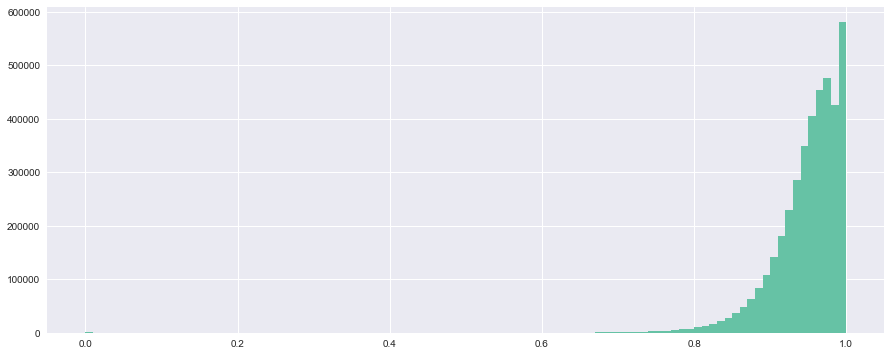

In [33]:
plt.hist(distances.flatten(), bins=100);

### Weight Matrix

In [34]:
all_weights = spectral.dist_to_adj_matrix(distances, 'gaussian')

In [35]:
weights = spectral.filter_neighbors(all_weights, 100)

In [36]:
def plot(weights, axes):
    axes[0].spy(weights)
    axes[1].hist(weights[weights > 0].reshape(-1), bins=50);

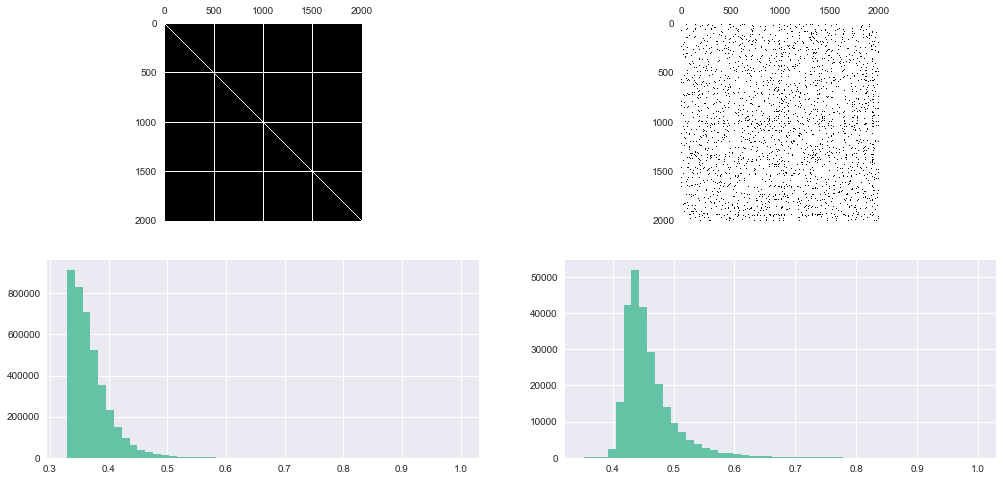

In [37]:
fix, axes = plt.subplots(2, 2, figsize=(17, 8))

plot(all_weights, axes[:, 0])
plot(weights, axes[:, 1])

#### horizontal white lines are due to pyplot.spy (proof below)

In [38]:
np.nonzero(all_weights.sum(axis = 0) == 0)

(array([], dtype=int64),)

### Degree matrix

In [39]:
degrees = np.sum(weights, axis=0)

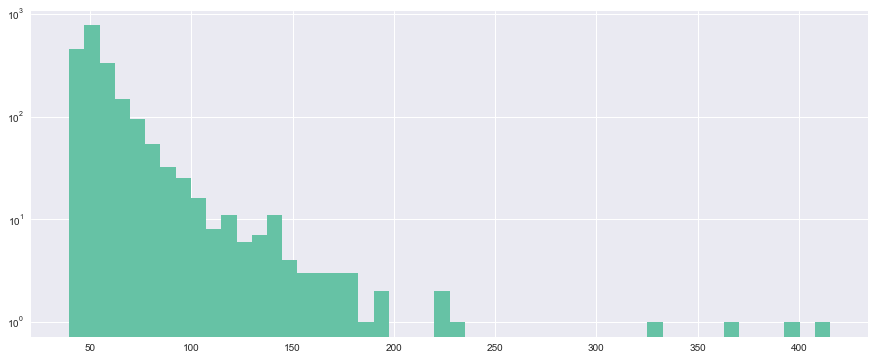

In [40]:
plt.hist(degrees, bins=50, log=True);

# 5. Unsupervised Clustering 

Spectral Decomposition + Gaussian Mixture Model (GMM) to define label

## 5.1 Spectral Decomposition

In [41]:
D = np.diag(degrees)
W = weights
L = D - W

inv_sqrt_D = np.diag(1 / np.diag(D**(0.5)))

normalized_laplacian = inv_sqrt_D @ L @ inv_sqrt_D

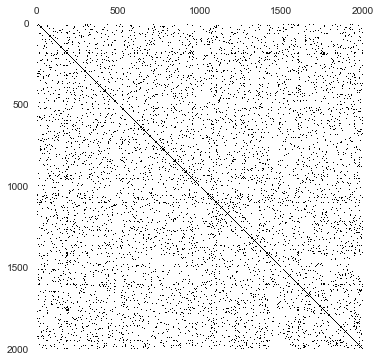

In [42]:
plt.spy(normalized_laplacian);

In [43]:
eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(normalized_laplacian, k=20, which='SM')

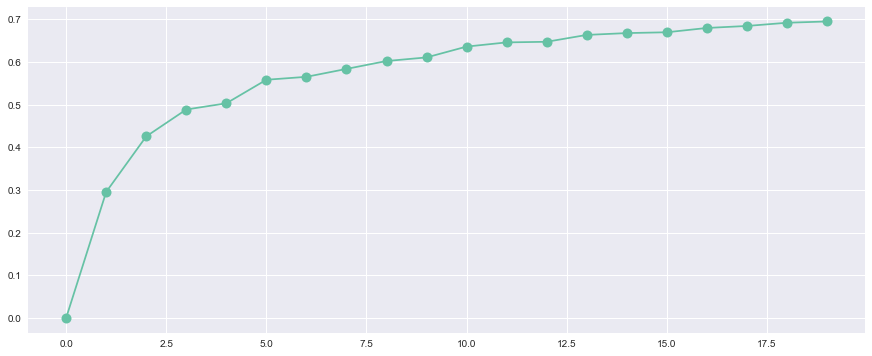

In [44]:
plt.plot(eigenvalues, '.-', markersize=20);

In [45]:
set(y_parent), selected_cat

({0, 1, 2, 3}, ['Computer', 'Politics', 'Recreational', 'Religion'])

In [46]:
label_to_name = dict(df_y_merged.reset_index()[['p_label', 'p_cat']].values)

Now, using the 2nd, 3rd and 4th eigenvectors and the true labels, we will look at whether or not the Spectral decomposition is usefull or not.

In [47]:
plots.plot3D(eigenvectors, y_parent, y_parent, label_to_name, node_size=4, opacity=1)

As we can see on the plot above, the different categories can clearly be separated when using 3 eigenvectors.

##  5.x Silhouette score

Once we have the eigenvectors, we would like to use an unsupervised clustering Algorithm. To make sure that we are selecting the number of cluster independently of the number of base categories, we will computer the silhouette score for different numbers of clusters and compare them.

$$silouhette = \frac{1}{N}\sum_{i=1}^{N} $$

We will later use an algorithm called GMM to create the cluster, and for this reason we will also use GMM for the Silhouette score.

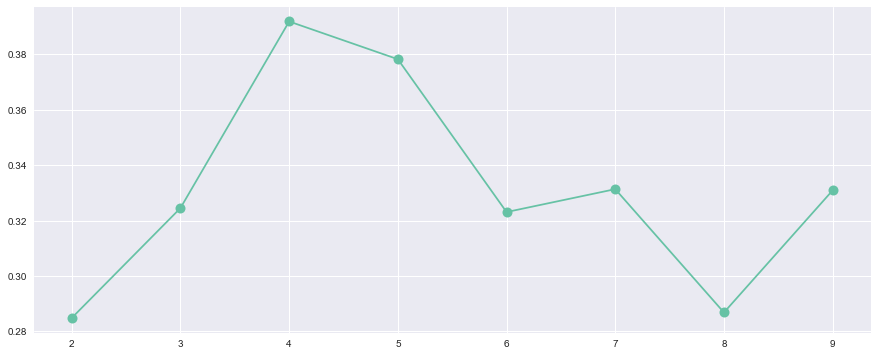

In [48]:
def get_silhouette_GMM(X, i):
    clusters = GaussianMixture(n_components=i, covariance_type='full', max_iter=500)
    clusters.fit(X)
    labels = np.argmax(clusters.predict_proba(X), axis=1)
    return metrics.silhouette_score(X, labels, metric='euclidean')

n_eigen=3
interval_of_interest = range(2, 10)
scores = [np.mean([get_silhouette_GMM(eigenvectors[:, 1:n_eigen+1], i) for _ in range(15)]) for i in interval_of_interest]

plt.plot(interval_of_interest, scores, '.-', markersize=20);

We can see above the silhouette scores for each number of clusters, note that the highest score is obtained with 4 clusters. And since a higher score is better, we will continue the rest of the project with 4 clusters.

Given that the number of base categories the base data comes from is equal to 4, it is not surprising that the optimal number of cluster is also equal to 4.

In [49]:
n_classes = interval_of_interest[np.argmax(scores)]

## 5.x Gaussian Mixture Model

In [50]:
y_true = preprocessing.LabelEncoder().fit_transform(y_parent)

new_label = sorted(set(y_true))
original_label = sorted(set(y_parent))

new_to_ori_dict = {n:o for n, o in zip(new_label, original_label)}
to_original_label = np.vectorize(lambda l: new_to_ori_dict[l])

In [51]:
gmm_clf = GaussianMixture(n_components=n_classes, covariance_type='full', max_iter=500, random_state=42)

In [52]:
gmm_clf.fit(eigenvectors[:, 1:n_eigen+1]);

In [53]:
y_pred_brute = gmm_clf.predict(eigenvectors[:, 1:n_eigen+1])
y_pred_proba_brute = gmm_clf.predict_proba(eigenvectors[:, 1:n_eigen+1])

In [54]:
cluster_names = {i:'Cluster ' + str(i) for i in range(n_classes)}

In [55]:
infos = np.array([plots.dis2text(arr, label_to_name) for arr in y_pred_proba_brute])
plots.plot3D(eigenvectors, y_pred_brute, infos, cluster_names, node_size=4, opacity=1)

** apart from the color which might not matching the label (a permutation would solve this -> see evalutation later), the results seem promising **

# 6. Evaluation

** apply best permutation **

In [56]:
best_perm = models.find_best_perm(y_true, y_pred_brute)
best_perm

(3, 0, 2, 1)

In [57]:
# apply best permutation
y_pred = np.vectorize(lambda x: best_perm[x])(y_pred_brute)
y_pred_proba = y_pred_proba_brute[:, best_perm]

In [58]:
f1_score(y_true, y_pred, average='weighted')

0.75534908273156454

In [59]:
accuracy_score(y_true, y_pred)

0.76649999999999996

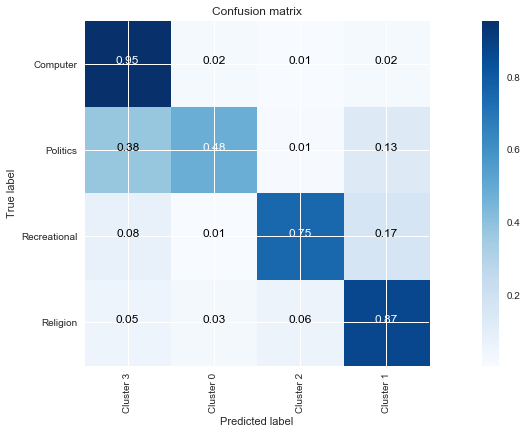

In [60]:
confusion_mat = confusion_matrix(y_pred=y_pred, y_true=y_true)
permuted_cluster_names = np.array(list(cluster_names.values()))[list(best_perm)]
plots.plot_confusion_matrix(confusion_mat, permuted_cluster_names, selected_cat, normalize=True)

# 7. Inference

In [141]:
new_texts = [
    "Maxime is our lord in the sky and on earth because he has an awesome macbook pro.\
    Its processor is a dualcore with 16Gb of RAM, no joke :O. But, what if his computer is like the apple for Adam ?",
    
    "Jesus is our lord in the sky and on earth because he has an awesome beard.",
    
    "Maxime has an awesome macbook pro. Its processor is a dualcore with 16Gb of RAM, no joke.",
    
    "Tchoukball /ˈtʃuːkbɔːl/ is an indoor team sport developed in the 1970s by Swiss biologist Dr Hermann Brandt. Dr Brandt was concerned about the number of injuries in sport at the time and as part of an educational study he wanted to create a sport that reduced injuries, was not aggressive between players and enabled people of all shapes, sizes, genders, cultures, and backgrounds to play together. The sport is usually played on an indoor court measuring 27 metres by 16 metres. At each end there is a 'frame' (a device similar to a trampoline off which the ball bounces) which measures one square metre and a semicircular D-shaped forbidden zone measuring three metres in radius. Each team can score on both ends of the court, and comprises 12 players, of which 7 may be on the court at any one time. In order to score a point, the ball must be thrown by an attacking player, hit the frame and bounce outside the 'D' without being caught by the defending team. Physical contact is prohibited, and defenders may not attempt to intercept the attacking team's passes. Players may take three steps with the ball, hold the ball for a maximum of three seconds, and teams may not pass the ball more than three times before shooting at the frame. Tchoukball has become an international sport, played in Brazil, Canada, China, the Czech Republic, Great Britain, India, Italy, Japan, Macau, Philippines, Poland, Singapore, Switzerland, Taiwan, and the United States. It is governed by the Féderation Internationale de Tchoukball (FITB, founded in 1971). Taiwan hosted the 2004 World Championships and won both the women's and junior championships, with the Swiss men winning the men's championship. The 2006 European Championships were held in Switzerland, with Great Britain taking both the Men's and Under-18's titles, while the hosts won the Women's event.."
]

In [142]:
new_eigenvectors = spectral.fast_spectral_decomposition(X, vectorizer, new_texts)

In [143]:
new_labels = [990+i for i, _ in enumerate(new_texts)]

In [144]:
new_y = np.append(y_parent, new_labels)

In [145]:
new_y_pred, new_y_pred_proba = models.fast_gmm(new_y * (new_y < 20), n_classes, new_eigenvectors)

In [146]:
for i, l in enumerate(new_labels):
    new_y_pred[i - len(new_labels)] = l

In [147]:
label_to_name_with_new = label_to_name.copy()
for l in new_labels:
    label_to_name_with_new[l] = 'New ' + str(l)

In [148]:
infos2 = np.array([plots.dis2text(arr, label_to_name_with_new) for arr in new_y_pred_proba])
plots.plot3D(new_eigenvectors, new_y_pred, infos2, label_to_name_with_new, node_size=5, opacity=1)

** We can clearly see that the ones with both keywords is in between the two expected labels, the two which contains topic specific label are close to their respective cluster **

** note: the labels here are the one we predicted in with the GMM, not the true ones. (this is what makes the result interesting in fact!) **

In [69]:
def new_text_to_pred_proba(label):
    # TODO return the percentage of each category for a given (unique) label
    return None

# 8. Limitations

In [70]:
# INSERT CODE

# 9. Conclusion

In [71]:
# INSERT CODE

We hope you enjoy our extension of your highly inspiring homework 03.

There might still be a lot to explore in that horizon especially if we wish to go further into graph analysis/learning, especially playing with PYGSP and maybe using neural networks...

# 10. Future Work

In [72]:
# INSERT CODE (or text ?) :)